In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from   scipy.ndimage import gaussian_filter1d
from   scipy.signal  import find_peaks

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from AnalysisGiessen import analyseGiessen


In [3]:
# Observation ID
which_obs = 2

In [4]:
# Load the data from the CSV file
data = pd.read_csv('waveform_resampled_all_pressure_traces_rv_with_pca.csv')
time_series = data.iloc[which_obs, 0:101]

In [5]:
reps = 6

In [6]:
time_df= pd.DataFrame({'Pressure' : np.tile(time_series.values, reps), 'cPressure' : np.tile(time_series.values, reps)}, 
                      index=[i for i in range(reps*len(time_series))])

In [7]:
ag = analyseGiessen(df=time_df)

In [8]:
ag.sigma_filter_pressure = 0.0001 # 6 
ag.sigma_filter_dpdt     = 0.0001 # 4
ag.sigma_filter_d2pdt2   = 0.0001 # 2
ag.compute_derivatives()
ag.compute_points_of_interest(height=0, height_d2pdt2=0)

In [9]:
ag._points_df

,a_epad_ind,epad_ind,dia_ind,sys_ind,esp_ind,edp_ind,eivc_ind,t_max_dpdt,t_min_dpdt,t_max_p,...,esp,sys,EF,dia,tau,Ees/Ea,iT,iHR,edp,eivc
0,193,167,101,174,187,157,171,0.264,0.368,0.292,...,17.525599,19.945805,0.322077,0.445506,0.009728,0.475094,0.404,148.514851,1.68996,18.811398
1,294,268,202,275,288,258,272,0.264,0.368,0.292,...,17.525599,19.945805,0.322077,0.445506,0.009728,0.475094,0.404,148.514851,1.68996,18.811398
2,395,369,303,376,389,359,373,0.264,0.368,0.292,...,17.525599,19.945805,0.322077,0.445506,0.009728,0.475094,0.404,148.514851,1.68996,18.811398
3,496,470,404,477,490,460,474,0.264,0.368,0.292,...,17.525599,19.945805,0.322077,0.445506,0.009728,0.475094,0.404,148.514851,1.68996,18.811398
4,597,571,505,578,591,561,575,0.264,0.368,0.292,...,17.525599,19.945805,0.322077,0.445506,0.009728,0.475094,0.400,150.000000,1.68996,18.811398


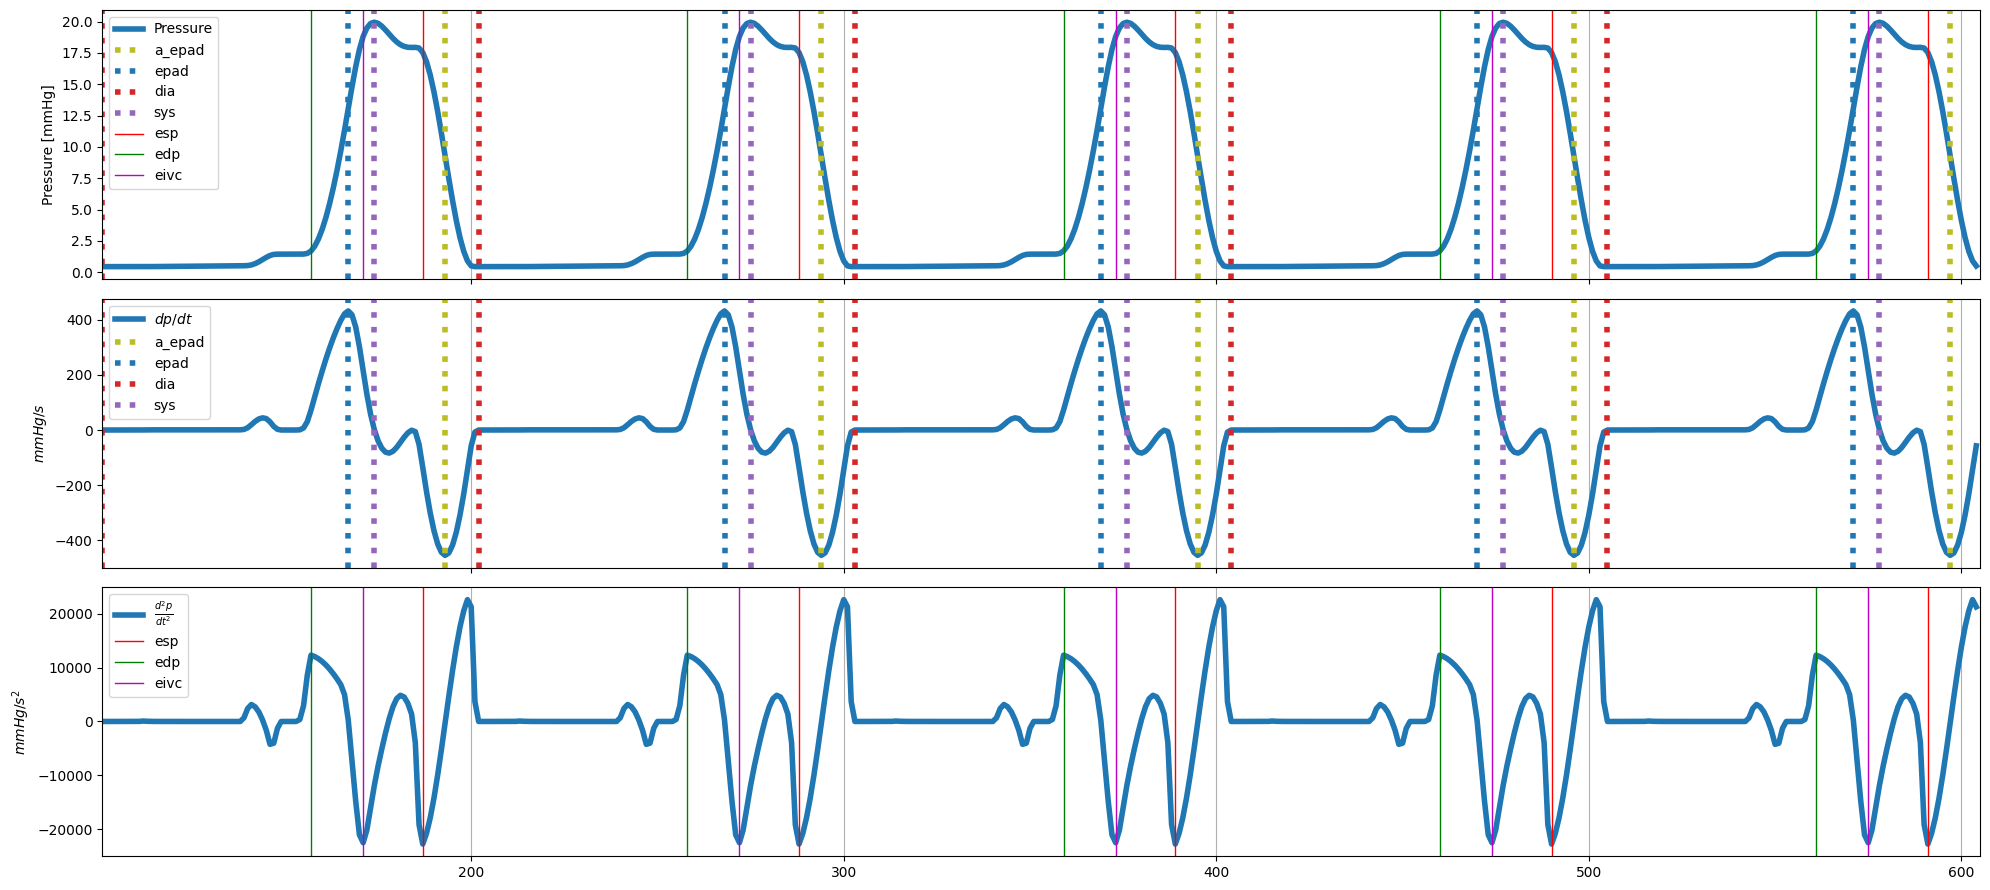

In [12]:
start = int(ag._points_df['dia_ind'].loc[0])
finish = len(ag._df) - 1
        
a_epad_ind = ag._points_df['a_epad_ind'].values.astype(int)
a_epad_ind = a_epad_ind[(a_epad_ind >= start) & (a_epad_ind < finish)]

epad_ind = ag._points_df['epad_ind'].values.astype(int)
epad_ind = epad_ind[(epad_ind >= start) & (epad_ind < finish)]

dia_ind = ag._points_df['dia_ind'].values.astype(int)
dia_ind = dia_ind[(dia_ind >= start) & (dia_ind < finish)]

sys_ind = ag._points_df['sys_ind'].values.astype(int)
sys_ind = sys_ind[(sys_ind >= start) & (sys_ind < finish)]

esp_ind = ag._points_df['esp_ind'].values.astype(int)
esp_ind = esp_ind[(esp_ind >= start) & (esp_ind < finish)]

edp_ind = ag._points_df['edp_ind'].values.astype(int)
edp_ind = edp_ind[(edp_ind >= start) & (edp_ind < finish)]

eivc_ind = ag._points_df['eivc_ind'].values.astype(int)
eivc_ind = eivc_ind[(eivc_ind >= start) & (eivc_ind < finish)]

fig, ax = plt.subplots(figsize=(20,9), nrows=3)
ax[0].grid(axis='x')
ax[0].plot(ag._df.index[start:finish], ag._df['fcPressure'].iloc[start:finish], label='Pressure', linewidth=4, linestyle='-')
ax[0].set_ylabel('Pressure [mmHg]')
ax[0].set_xlim([ag._df.index[start], ag._df.index[finish]])
ax[0].tick_params(axis='x',labelbottom=False)

flag0 = True
for a_epad, epad, dia, sys, esp, edp, eivc in zip(a_epad_ind, epad_ind, dia_ind, sys_ind, esp_ind, edp_ind, eivc_ind):
    ax[0].axvline(ag._df.index[a_epad], color=mcolors.TABLEAU_COLORS['tab:olive'], linewidth=4, linestyle=':', label='a_epad' if flag0 else None)
    ax[0].axvline(ag._df.index[epad],   color=mcolors.TABLEAU_COLORS['tab:blue'],  linewidth=4, linestyle=':', label='epad' if flag0 else None)
    ax[0].axvline(ag._df.index[dia],    color=mcolors.TABLEAU_COLORS['tab:red'],   linewidth=4, linestyle=':', label='dia' if flag0 else None)
    ax[0].axvline(ag._df.index[sys],    color=mcolors.TABLEAU_COLORS['tab:purple'],linewidth=4, linestyle=':', label='sys' if flag0 else None)
    ax[0].axvline(ag._df.index[esp],    color='r',                                 linewidth=1, linestyle='-', label='esp' if flag0 else None)
    ax[0].axvline(ag._df.index[edp],    color='g',                                 linewidth=1, linestyle='-', label='edp' if flag0 else None)
    ax[0].axvline(ag._df.index[eivc],   color='m',                                 linewidth=1, linestyle='-', label='eivc' if flag0 else None)
    flag0 = False
ax[0].legend()

ax[1].grid(axis='x')
ax[1].plot(ag._df.index[start:finish], ag._df['fdpdt'].iloc[start:finish] , label='${dp}/{dt}$', linewidth=4, linestyle='-')
ax[1].set_ylabel('$mmHg/s$')
ax[1].set_xlim([ag._df.index[start], ag._df.index[finish]])
ax[1].tick_params(axis='x',labelbottom=False)

flag1 = True
for a_epad, epad, dia, sys in zip(a_epad_ind, epad_ind, dia_ind, sys_ind):
    ax[1].axvline(ag._df.index[a_epad], color=mcolors.TABLEAU_COLORS['tab:olive'], linewidth=4, linestyle=':', label='a_epad' if flag1 else None)
    ax[1].axvline(ag._df.index[epad],   color=mcolors.TABLEAU_COLORS['tab:blue'],  linewidth=4, linestyle=':', label='epad' if flag1 else None)
    ax[1].axvline(ag._df.index[dia],    color=mcolors.TABLEAU_COLORS['tab:red'],   linewidth=4, linestyle=':', label='dia' if flag1 else None)
    ax[1].axvline(ag._df.index[sys],    color=mcolors.TABLEAU_COLORS['tab:purple'],  linewidth=4, linestyle=':', label='sys' if flag1 else None)
    flag1 = False
ax[1].legend()


ax[2].grid(axis='x')
ax[2].plot(ag._df.index[start:finish], ag._df['fd2pdt2'].iloc[start:finish] , label='$\\frac{d^2p}{dt^2}$', linewidth=4, linestyle='-')
ax[2].set_ylabel('$mmHg/s^2$')

flag2 = True
for sys, a_epad, esp, edp, eivc in zip(sys_ind, a_epad_ind, esp_ind, edp_ind, eivc_ind):
    ax[2].axvline(ag._df.index[esp],    color='r',                                   linewidth=1, linestyle='-', label='esp' if flag2 else None)
    ax[2].axvline(ag._df.index[edp],    color='g',                                   linewidth=1, linestyle='-', label='edp' if flag2 else None)
    ax[2].axvline(ag._df.index[eivc],   color='m',                                   linewidth=1, linestyle='-', label='eivc' if flag2 else None)
    flag2 = False
ax[2].set_xlim([ag._df.index[start], ag._df.index[finish]])
# ax[2].tick_params(axis='x', labelbottom=False)
ax[2].legend()

fig.tight_layout()

In [11]:
import os
from PIL import Image
import matplotlib.pyplot as plt

dir = '/figures/posterior_simulated_waveforms.png'
# List of full paths to your 6 plot images
image_paths = [
    f"../output_synthetic/output_4096_6_params/bayesian_calibration_results/20_output_keys/calibration_20250627_124804{dir}",  # CI
    f"../output_synthetic/output_4096_7_params/bayesian_calibration_results/101_output_keys/calibration_20250701_201901{dir}", # waveform 
    f"../output_synthetic/output_4096_11_params/bayesian_calibration_results/10_output_keys/calibration_20250701_170301{dir}", # pca all
    f"../output_synthetic/output_4096_9_params/bayesian_calibration_results/3_output_keys/calibration_20250701_193524{dir}",   # pca 123
    f"../output_synthetic/output_4096_6_params/bayesian_calibration_results/124_output_keys/calibration_20250702_091043{dir}", # CI + timeseries + pca123
    f"../output_synthetic/output_4096_6_params/bayesian_calibration_results/124_output_keys/calibration_20250702_091043{dir}", # CI + timeseries + pca123
    

    

   
]

# Load images
images = [Image.open(p) for p in image_paths]

# Plot them in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(25, 10))

for ax, img, path in zip(axes.ravel(), images, image_paths):
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.savefig("combined_figure.png", dpi=300)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../output_synthetic/output_4096_6_params/bayesian_calibration_results/124_output_keys/calibration_20250702_091043/figures/posterior_simulated_waveforms.png'